In [49]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
# Read file into dataframe
df_tweets = pd.read_csv('../06_Feature Selection & Engineering/dataset_tweets_featured.csv', sep=',', encoding='utf-8')
print(df_tweets.shape)
df_tweets.head(5)

(47692, 12)


,tweet_text,cyberbullying_type,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
0,"IN OTHER WORDS #KATANDANDRE, YOUR FOOD WAS CRA...",not_cyberbullying,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,WHY IS #AUSSIETV SO WHITE? #MKR #THEBLOCK #IMA...,not_cyberbullying,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,@XOCHITLSUCKKKS A CLASSY WHORE? OR MORE RED VE...,not_cyberbullying,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"@JASON_GIO MEH. :P THANKS FOR THE HEADS UP, B...",not_cyberbullying,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,@RUDHOEENGLISH THIS IS AN ISIS ACCOUNT PRETEND...,not_cyberbullying,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Drop the Column 'tweet_text'

In [51]:
df_tweets = df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].head(5)

In [52]:
df_tweets['cyberbullying_type'].unique()

array(['not_cyberbullying'], dtype=object)

# Data Cleaning and Preparation
This step is in the File Folder "04_Data Cleansing".

# Declaration of the data

In [53]:
df_tweets.shape

(5, 11)

In [54]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cyberbullying_type  5 non-null      object 
 1   harass              5 non-null      float64
 2   cyberstalk          5 non-null      float64
 3   flaming             5 non-null      float64
 4   outing              5 non-null      float64
 5   doxing              5 non-null      float64
 6   exclusion           5 non-null      float64
 7   impersonation       5 non-null      float64
 8   trolling            5 non-null      float64
 9   hateSpeech          5 non-null      float64
 10  threats             5 non-null      float64
dtypes: float64(10), object(1)
memory usage: 572.0+ bytes


# Non Graphical Univariate EDA

### Summary statistics of numeric variables

In [55]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].describe()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
count,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.0,5.0,5.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.447214,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


### Quantiles
As the colums only have the value 0 or 1, the Quantiles are set accordingly.

In [56]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95], axis=0, numeric_only=True).round(2)

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0
0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0


### Measures of dispersion

In [57]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].var()

harass           0.0
cyberstalk       0.0
flaming          0.0
outing           0.0
doxing           0.0
exclusion        0.0
impersonation    0.2
trolling         0.0
hateSpeech       0.0
threats          0.0
dtype: float64

In [58]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].std()

harass           0.000000
cyberstalk       0.000000
flaming          0.000000
outing           0.000000
doxing           0.000000
exclusion        0.000000
impersonation    0.447214
trolling         0.000000
hateSpeech       0.000000
threats          0.000000
dtype: float64

### Skewness

In [59]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].skew()

harass           0.000000
cyberstalk       0.000000
flaming          0.000000
outing           0.000000
doxing           0.000000
exclusion        0.000000
impersonation    2.236068
trolling         0.000000
hateSpeech       0.000000
threats          0.000000
dtype: float64

The skewness of the values are <0, which means they're right-skewed.

### Kurtosis

In [60]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].kurtosis()

harass           0.0
cyberstalk       0.0
flaming          0.0
outing           0.0
doxing           0.0
exclusion        0.0
impersonation    5.0
trolling         0.0
hateSpeech       0.0
threats          0.0
dtype: float64

The kurtosis values are all pretty high, which means they have a high peak.

### Extreme values
Because the fields only have the values 0 or 1, there are no extreme values.

In [61]:
for column in df_tweets.columns:
    # Get unique values in the current column
    unique_values = df_tweets[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in '{column}' column:{unique_values}\n")

Unique values in 'cyberbullying_type' column:['not_cyberbullying']

Unique values in 'harass' column:[0.]

Unique values in 'cyberstalk' column:[0.]

Unique values in 'flaming' column:[0.]

Unique values in 'outing' column:[0.]

Unique values in 'doxing' column:[0.]

Unique values in 'exclusion' column:[0.]

Unique values in 'impersonation' column:[0. 1.]

Unique values in 'trolling' column:[0.]

Unique values in 'hateSpeech' column:[0.]

Unique values in 'threats' column:[0.]



# Non Graphical Multivariate EDA

### Cross-tabulation

In [62]:
pd.crosstab(df_tweets['harass'], df_tweets['cyberbullying_type'])

cyberbullying_type,not_cyberbullying
harass,
0.0,5


### Pivot Tables

In [63]:
pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']],
               index=['cyberbullying_type'],
               values=['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats'],
               aggfunc=np.mean)

/var/folders/y8/blsng9yn0_jdwkc6k9fx0f240000gn/T/ipykernel_42066/2287437167.py:1: FutureWarning: The provided callable <function mean at 0x108ac8860> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']],


,cyberstalk,doxing,exclusion,flaming,harass,hateSpeech,impersonation,outing,threats,trolling
cyberbullying_type,,,,,,,,,,
not_cyberbullying,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0


### Correlation Matrix

In [64]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].corr()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
harass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyberstalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flaming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doxing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exclusion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
impersonation,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
trolling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hateSpeech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
threats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Covariance Matrix

In [65]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].cov()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
harass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cyberstalk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
flaming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
outing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doxing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
exclusion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
impersonation,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
trolling,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hateSpeech,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
threats,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Graphical Univariate EDA
Most Graphics like Line, Histograms, Density Plots, QQ-Plots or Barcharts don't make sense, as the values are mostly 0 or 1.

### Boxplot (seaborn)
Boxplot doesn't really make sense, as the values are only 0 and 1.

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='impersonation'>

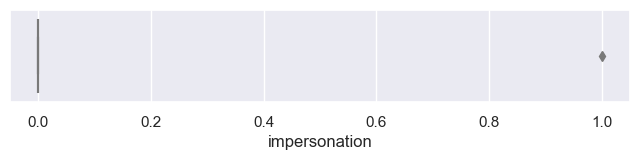

In [66]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['impersonation'], color="lightblue")

### Piechart (matplotlib)

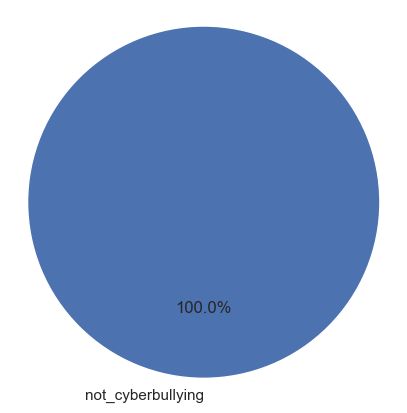

In [68]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df_tweets.cyberbullying_type.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

# Graphical Multivariate EDA
Most Graphics like Scatterplots, Regressionlines, Matrices, Hexagonal binning plots or Correlation heatmaps don't make sense, as the values are mostly 0 or 1.

### Example Correlation heatmap:

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

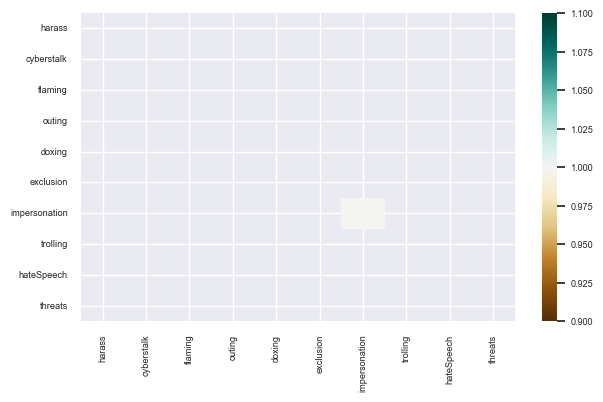

In [70]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)